<a href="https://colab.research.google.com/github/rimayadwiatika11/DATASET_STATISTIK_G1A021019-DAN-G1A021021/blob/main/HANDLING%20OUTLIERS%20AND%20CORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS DATASET STATISTIKA**

**Nama Anggota Kelompok :**

*   **Rose Enjellina   (G1A021019)**
*   **Rimaya Dwi Atika (G1A021021)**




**INFORMATIKA A**

## HANDLING OUTLIERS

In [42]:
#IMPORT LIBRARY YANG DIBUTUHKAN

import pandas as pd
import seaborn as sns
import pandas as pan
import matplotlib.pyplot as plt
import numpy as np
import numpy as num
import statistics

In [19]:
#MENAMBAHKAN DATASET
#load dataset menggunakan URL
df = pd.read_csv("https://raw.githubusercontent.com/rimayadwiatika11/DATASET_STATISTIK_G1A021019-DAN-G1A021021/main/Dataset_Melbourne_Housing.csv")

In [20]:
#Menampilkan 5 record teratas dari dataset yang telah di load, menggunakan head()
#Data yang digunakan adalah data belanja Konsumen dimana terdapat jenis kelamin, umur penghasilan dan pengeluaran
df.head()

,Date,Suburb,Address,Rooms,Type,Price,Method,SellerG
0,9/3/2016,Abbotsford,68 Studley St,2,h,8250000.0,SS,Jellis
1,12/3/2016,Abbotsford,85 Turner St,2,h,NaN,S,Biggin
2,2/4/2016,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin
3,2/4/2016,Abbotsford,18/659 Victoria St,3,u,1801000.0,VB,Rounds
4,3/4/2017,Abbotsford,5 Charles St,3,h,NaN,SP,Biggin


In [21]:
#Panjang Dataset(Baris, Kolom)

df.shape

(201, 8)

In [22]:
#Menampilkan informasi column, datatype dan informasi struktur lainnya pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     201 non-null    object 
 1   Suburb   201 non-null    object 
 2   Address  201 non-null    object 
 3   Rooms    201 non-null    int64  
 4   Type     201 non-null    object 
 5   Price    195 non-null    float64
 6   Method   201 non-null    object 
 7   SellerG  201 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.7+ KB


In [23]:
#descriptive statistics dataset

df.describe()

,Rooms,Price
count,201.000000,1.950000e+02
mean,2.751244,1.623832e+06
std,0.887587,2.425690e+06
min,1.000000,1.000000e+05
25%,2.000000,7.200000e+05
50%,3.000000,1.030000e+06
75%,3.000000,1.775000e+06
max,7.000000,2.200000e+07


In [24]:
# mengganti missing value menggunakan Mode

df['Price'] = df['Price'].fillna(df['Price'].mode()[0])
df.head()

,Date,Suburb,Address,Rooms,Type,Price,Method,SellerG
0,9/3/2016,Abbotsford,68 Studley St,2,h,8250000.0,SS,Jellis
1,12/3/2016,Abbotsford,85 Turner St,2,h,1801000.0,S,Biggin
2,2/4/2016,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin
3,2/4/2016,Abbotsford,18/659 Victoria St,3,u,1801000.0,VB,Rounds
4,3/4/2017,Abbotsford,5 Charles St,3,h,1801000.0,SP,Biggin


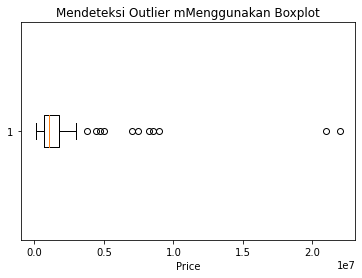

In [26]:
#Menampilkan outliers dataset pada baris writing score menggunakan boxplot
sample= df["Price"]

plt.boxplot(sample, vert=False)
plt.title("Mendeteksi Outlier mMenggunakan Boxplot")
plt.xlabel('Price')
plt.show()

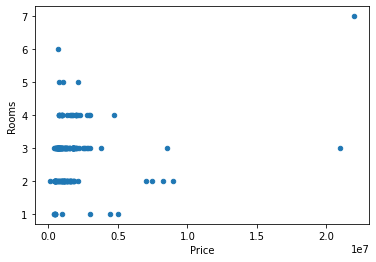

In [28]:
#Mengidentifikasi Outlier menggunakan Scatter plot
# Titik titik yang berpencar menjauh adalah Outliers

df.plot(x='Price',y='Rooms',kind = 'scatter') 
plt.show()

In [30]:
outliers = []
def detect_outliers_zscore(data):
    theres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > theres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [8970000.0, 21000000.0, 22000000.0]


In [32]:
#Mencari nilai kuartil 1, kuartil 3, dan IQR

Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

nilai_min = np.min(df["Price"])
nilai_max = np.max(df["Price"])

Kuartil 1 =  722000.0
Kuartil 3 =  1801000.0
IQR =  1079000.0
IQR minimum =  -896500.0
IQR maksimum =  3419500.0


In [33]:
#Mencari Outlier menggunakan IQR
low_out = []
high_out = []

for i in df["Price"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  [8250000.0, 8500000.0, 8970000.0, 7450000.0, 7000000.0, 5000000.0, 4410000.0, 21000000.0, 22000000.0, 4735000.0, 3755000.0]


In [35]:
#menghapus outlier berdasarkan rentang IQR dan menyimpan hasilnya dalam bingkai data 'df_new'
# Setelah dihapus panjang dataset yang semula (200,5) menjadi (192,5) berarti sebanyak 8 data dihapus

df_new = df[~((df.Price < (Q1 - 1.5 * IQR)) | (df.Price > (Q3 + 1.5 * IQR)))]
df_new

,Date,Suburb,Address,Rooms,Type,Price,Method,SellerG
1,12/3/2016,Abbotsford,85 Turner St,2,h,1801000.0,S,Biggin
2,2/4/2016,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin
3,2/4/2016,Abbotsford,18/659 Victoria St,3,u,1801000.0,VB,Rounds
4,3/4/2017,Abbotsford,5 Charles St,3,h,1801000.0,SP,Biggin
6,6/4/2016,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson
...,...,...,...,...,...,...,...,...
196,9/3/2016,Alphington,5/6 Yarralea St,3,h,1110000.0,S,Jellis
197,3/4/2017,Alphington,136A Fulham Rd,3,h,1492000.0,S,Jellis
198,5/7/2016,Alphington,1/9 Roemer Cr,2,u,480000.0,PI,Miles
199,5/7/2016,Alphington,4 Tuckett St,3,h,560000.0,S,Jellis


In [36]:
# Menentukan flooring and capping pada dataset

tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

500000.0 2485000.0
New array: [2485000. 1801000. 1035000. 1801000. 1801000. 2485000. 1600000. 1985000.
  956250. 2485000.  941000. 1876000.  856000. 1985000. 1636000. 1000000.
 2485000. 2485000. 1097000.  542000. 1636000.  760000.  500000. 2485000.
 1350000.  750000. 1985000. 2485000. 1172500. 2485000. 1310000. 1801000.
 1200000.  847000. 1636000. 1176500.  955000.  890000. 1330000.  962500.
  900000. 1090000.  500000. 1100000. 1315000.  500000.  500000. 1801000.
  500000. 1447500.  500000. 1135000.  700000. 1542000.  962000. 1290000.
 1290000.  500000. 1180000. 1195000. 1562500. 1012500.  970000. 1030000.
 1685000.  927000.  840000.  730000.  770000. 1201000.  603000.  700000.
  600000.  500000.  500000.  500000. 1035000.  960000.  960000.  720000.
  785000.  725000.  500000.  515000.  680000.  530000.  895000.  600000.
  805000.  760000.  752000.  580000.  725000.  758000.  500000.  970000.
  755000.  985000.  700000.  509500.  830000.  500000.  670000.  675000.
 1042000.  910000.  7

In [37]:
# mengganti Nilai Outlier Menggunakan Imputation (median)

median = np.median(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      8250000.0
1      1801000.0
2      1035000.0
3      1801000.0
4      1801000.0
         ...    
196    1110000.0
197    1492000.0
198     480000.0
199     560000.0
200    1304000.0
Name: Price, Length: 201, dtype: float64
New array:  [8.2500e+06 1.8010e+06 1.0350e+06 1.8010e+06 1.8010e+06 8.5000e+06
 1.6000e+06 1.9850e+06 9.5625e+05 8.9700e+06 9.4100e+05 1.8760e+06
 8.5600e+05 1.9850e+06 1.6360e+06 1.0000e+06 7.4500e+06 3.0000e+06
 1.0970e+06 5.4200e+05 1.6360e+06 7.6000e+05 4.8100e+05 7.0000e+06
 1.3500e+06 7.5000e+05 1.9850e+06 5.0000e+06 1.1725e+06 4.4100e+06
 1.3100e+06 1.8010e+06 1.2000e+06 8.4700e+05 1.6360e+06 1.1765e+06
 9.5500e+05 8.9000e+05 1.3300e+06 9.6250e+05 9.0000e+05 1.0900e+06
 5.0000e+05 1.1000e+06 1.3150e+06 4.8000e+05 4.2350e+05 1.8010e+06
 4.2600e+05 1.4475e+06 4.5700e+05 1.1350e+06 7.0000e+05 1.5420e+06
 9.6200e+05 1.2900e+06 1.2900e+06 4.7000e+05 1.1800e+06 1.1950e+06
 1.5625e+06 1.0125e+06 9.7000e+05 1.0300e+06 1.6850e+06 9.2700e+05
 8.4000e+05 7.

In [38]:
# mengganti Nilai Outlier Menggunakan Imputation (mean)

mean = np.mean(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      8250000.0
1      1801000.0
2      1035000.0
3      1801000.0
4      1801000.0
         ...    
196    1110000.0
197    1492000.0
198     480000.0
199     560000.0
200    1304000.0
Name: Price, Length: 201, dtype: float64
New array:  [8.2500e+06 1.8010e+06 1.0350e+06 1.8010e+06 1.8010e+06 8.5000e+06
 1.6000e+06 1.9850e+06 9.5625e+05 8.9700e+06 9.4100e+05 1.8760e+06
 8.5600e+05 1.9850e+06 1.6360e+06 1.0000e+06 7.4500e+06 3.0000e+06
 1.0970e+06 5.4200e+05 1.6360e+06 7.6000e+05 4.8100e+05 7.0000e+06
 1.3500e+06 7.5000e+05 1.9850e+06 5.0000e+06 1.1725e+06 4.4100e+06
 1.3100e+06 1.8010e+06 1.2000e+06 8.4700e+05 1.6360e+06 1.1765e+06
 9.5500e+05 8.9000e+05 1.3300e+06 9.6250e+05 9.0000e+05 1.0900e+06
 5.0000e+05 1.1000e+06 1.3150e+06 4.8000e+05 4.2350e+05 1.8010e+06
 4.2600e+05 1.4475e+06 4.5700e+05 1.1350e+06 7.0000e+05 1.5420e+06
 9.6200e+05 1.2900e+06 1.2900e+06 4.7000e+05 1.1800e+06 1.1950e+06
 1.5625e+06 1.0125e+06 9.7000e+05 1.0300e+06 1.6850e+06 9.2700e+05
 8.4000e+05 7.

Text(0.5, 0, 'Price')

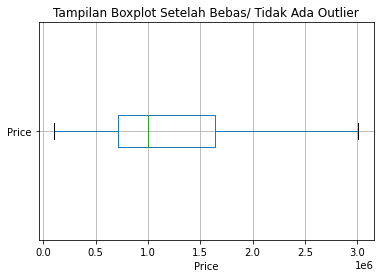

In [39]:
#Menampilkan boxplot yang telah bebas dari outliers 

df_new.boxplot(["Price"],vert=False)
plt.title("Tampilan Boxplot Setelah Bebas/ Tidak Ada Outlier")
plt.xlabel("Price")

## Correlation Analysis (bivariate)






In [40]:
# Menemukan korelasi antara semua variabel numerik

df.select_dtypes(['float64' , 'int64']).corr()

,Rooms,Price
Rooms,1.000000,0.221991
Price,0.221991,1.000000


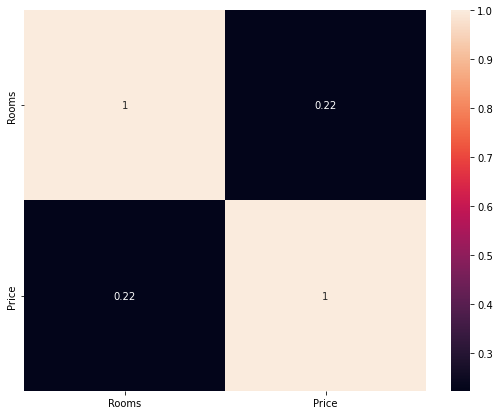

In [41]:
# ini adalah tampilan korelasi menggunakan heatmap  semakin pekat warnannya maka korelasinya akan semakin kuat

plt = plt.figure(figsize=(9,7)) 
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(), annot=True) 
plt.show()